In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.svm import SVC

In [2]:
forest_dt=pd.read_csv('forestfires.csv')
forest_dt.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest_dt.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [4]:
forest_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest_dt.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

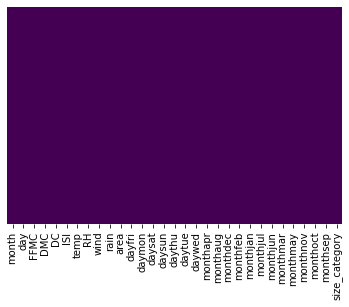

In [6]:
sns.heatmap(forest_dt.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [7]:
forest_dt[forest_dt.duplicated()].shape

(8, 31)

In [8]:
forest_dt.shape

(517, 31)

In [9]:
forest_dt.drop_duplicates(inplace=True)
forest_dt.shape

(509, 31)

In [10]:
## There are no null and duplicate values in data now


#### Describe the data

In [11]:
forest_dt.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
forest_dt.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [13]:
forest_dt['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [14]:
forest_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

## Separating feature data and Label data and train-test split


#### We will drop the month and day columns from the dataframe as it already encoded with dummy encoding and converted to 0 and 1


In [15]:
forest_dt=forest_dt.drop(['month','day'],axis=1)
forest_dt.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [16]:
X=forest_dt.iloc[:,0:-1]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
Y=forest_dt['size_category']
Y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                               random_state=41)


In [20]:
X_train.shape

(356, 28)

In [21]:
X_test.shape

(153, 28)

In [22]:
svm=SVC()
svm.fit(X_train,Y_train)
y_pred_svm=svm.predict(X_test)
y_pred_svm

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [23]:
print(accuracy_score(Y_test,y_pred_svm))

0.7712418300653595


In [24]:

print(confusion_matrix(Y_test, y_pred_svm))

[[  5  35]
 [  0 113]]


In [25]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

       large       1.00      0.12      0.22        40
       small       0.76      1.00      0.87       113

    accuracy                           0.77       153
   macro avg       0.88      0.56      0.54       153
weighted avg       0.83      0.77      0.70       153



In [26]:
## So we have Classified the Size_Categories using SVM